In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import os

In [2]:
df_train = pd.read_csv(r"C:\Users\HOSEIN\projects/data/Fashion MNIST/fashion-mnist_train.csv")
df_test = pd.read_csv(r"C:\Users\HOSEIN\projects/data/Fashion MNIST/fashion-mnist_test.csv")

In [3]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.shape

(60000, 785)

In [5]:
df_train.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [6]:
df_test.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


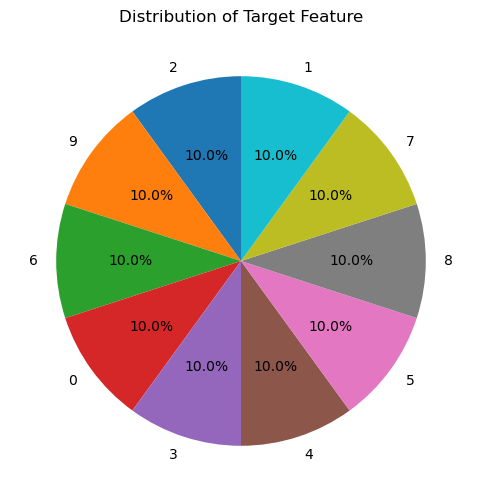

In [8]:
df_train["label"].value_counts().plot.pie(autopct="%1.1f%%", startangle = 90, figsize = (6,6))
plt.title("Distribution of Target Feature")
plt.ylabel("")
plt.show()

هر کدام از اعداد تارگت نماد یک لباس است. فیچر تارگت کاملا بالانس است.

In [9]:
x = df_train.drop("label", axis=1).values
y = df_train["label"].values
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [10]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\HOSEIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_pred = model.predict(x_val)
print("Classification report:\n", classification_report(y_val, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81      1200
           1       0.96      0.97      0.97      1200
           2       0.76      0.76      0.76      1200
           3       0.86      0.86      0.86      1200
           4       0.73      0.82      0.77      1200
           5       0.95      0.90      0.92      1200
           6       0.68      0.56      0.61      1200
           7       0.91      0.92      0.92      1200
           8       0.94      0.95      0.94      1200
           9       0.92      0.95      0.93      1200

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



In [12]:
model_xgb = xgb.XGBClassifier(
    objective="multi:softprob",
    num_class=10,
    learning_rate=0.05,
    n_estimators=1000,
    max_depth=3,
    min_child_weight=5,
    subsample=0.7,
    colsample_bytree=0.7,
    gamma=0.1,
    reg_alpha=0.5,
    reg_lambda=2,
    random_state=42,
    eval_metric="mlogloss",
    early_stopping_rounds=50
)

model_xgb.fit(
    x_train, y_train,
    eval_set=[(x_val, y_val)],
    verbose=100
)


[0]	validation_0-mlogloss:2.17536
[100]	validation_0-mlogloss:0.48653
[200]	validation_0-mlogloss:0.37907
[300]	validation_0-mlogloss:0.34043
[400]	validation_0-mlogloss:0.31917
[500]	validation_0-mlogloss:0.30525
[600]	validation_0-mlogloss:0.29555
[700]	validation_0-mlogloss:0.28820
[800]	validation_0-mlogloss:0.28242
[900]	validation_0-mlogloss:0.27809
[999]	validation_0-mlogloss:0.27434


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=0.1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None, num_class=10, ...)

In [13]:
y_pred_xgb = model_xgb.predict(x_val)
print("Classification report:\n", classification_report(y_val, y_pred_xgb))

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      1200
           1       0.99      0.98      0.99      1200
           2       0.83      0.83      0.83      1200
           3       0.91      0.92      0.91      1200
           4       0.81      0.86      0.84      1200
           5       0.99      0.97      0.98      1200
           6       0.75      0.67      0.71      1200
           7       0.94      0.96      0.95      1200
           8       0.97      0.97      0.97      1200
           9       0.97      0.95      0.96      1200

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000



In [21]:
BASE_DIR = r"C:\Users\HOSEIN\projects\models"
MODEL_DIR = os.path.join(BASE_DIR, "mnist-xgboost")
os.makedirs(MODEL_DIR, exist_ok = True)

model_file_name = f"mnist-xgboost-v1.json"
model_path = os.path.join(MODEL_DIR, model_file_name)

model_xgb.save_model(model_path)